Epidemiologicial Threshold for large city: 3.0
Epidemiologicial Threshold for medium city: 1.25
Epidemiologicial Threshold for small city: 0.16666666666666669


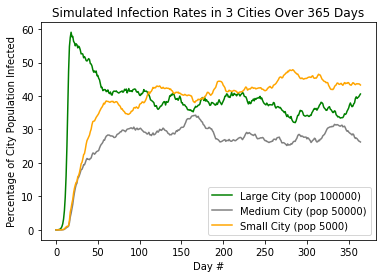

In [21]:
ys = Simulation()
days = array(range(SAMPLE_LENGTH))

BigCity, MedCity, SmallCity = zip(*ys)
cities_with_colors_and_labels = (
    (BigCity, 'green', f'Large City (pop {BIG})'),
    (MedCity, 'grey', f'Medium City (pop {MEDIUM})'),
    (SmallCity, 'orange', f'Small City (pop {SMALL})'))

for y, color, label in cities_with_colors_and_labels:
    plt.plot(days, array(y), color=color, label=label)

plt.title(f"Simulated Infection Rates in 3 Cities Over {SAMPLE_LENGTH} Days")
plt.xlabel("Day #")
plt.ylabel("Percentage of City Population Infected")
plt.legend()
plt.savefig("Disease_Simulation1.png")
plt.show()

   The graph shows the infection rates of a fictional disease in three different cities. Above are the R0 values within each city; as expected, there is a lower R0 value in smaller cities due to a lower number of susceptible people. For reference, the COVID-19 R0 value in Italy ranged from around 3.5 before social distancing to about .9 after (Giordano et al, *Modeling the COVID-19 epidemic and implementation of population-wide interventions in Italy*, Nature 2020). The parameters also take into account certain factors that often affect rural and urban areas; the larger city has a higher infection rate Beta, but also a significantly higher recovery rate Gamma due to better medical infrastructure. Furthermore, there was a random possibility that each day, anywhere from 0 to 1/5 the population of each city would travel to another city. Travelers who had the disease could spread it to recovered people in other cities, simulating the possibility of new strains. The Kermack-Mckendrick model was used to determine infection rates (Total new infections = B\*S\*I - y\*I). The initial spike in the large city was expected as there was such a high number of susceptible people, but it did not drop off nearly as much as the Kermack-McKendrick model predicts. The medium and small cities saw a delayed rise because they had lower beta values and the disease was first introduced in the large city. However, they never dropped off due to the travel between the cities. While travel numbers and the possibility of new strains are certainly exaggerated, this demonstrates the effect that mixing populations has on epidemic containment.

In [20]:
import numpy.random as npr
import matplotlib.pyplot as plt
from numpy import array

SAMPLE_LENGTH = 365
BIG = 100000
MEDIUM = 50000
SMALL = 5000

class City:
    def __init__(self, population, gamma, beta, size):
        self.population = population
        self.size = size
        self.gamma = gamma
        self.susceptible = population
        self.infected = 0 
        self.recovered = 0
        self.beta = beta
        print(f"Epidemiologicial Threshold for {self.size} city: " + str(beta/gamma * self.susceptible))

    def infect(self):
        self.infected += self.beta * self.susceptible * self.infected - self.gamma * self.infected

def noTravel():
        BigCity = City(BIG, .5, .000015, "large")
        MedCity = City(MEDIUM, .4, .00001, "medium")
        SmallCity = City(SMALL, .3, .00001, "small")
        BigCity.infected = 10
        MedCity.infected = 10
        SmallCity.infected = 10
        infected_list = [(BigCity.infected/BigCity.population * 100, MedCity.infected/MedCity.population * 100, SmallCity.infected/SmallCity.population * 100)]
        
        for day in range(SAMPLE_LENGTH - 1):
            BigCity.infect()
            MedCity.infect()
            SmallCity.infect()
            infected_list.append((100*BigCity.infected/BigCity.population, 100*MedCity.infected/MedCity.population, 100*SmallCity.infected/SmallCity.population))
        return infected_list
        
def Simulation():
    BigCity = City(BIG, .5, .000015, "large")
    MedCity = City(MEDIUM, .4, .00001, "medium")
    SmallCity = City(SMALL, .3, .00001, "small")
    BigCity.infected = 10
    infected_list = [(BigCity.infected/BigCity.population * 100, MedCity.infected/MedCity.population * 100, SmallCity.infected/SmallCity.population * 100)]
    
    for day in range(SAMPLE_LENGTH - 1):
        big_travelers = npr.randint(0, BigCity.population/50 + 1) 
        med_travelers = npr.randint(0, MedCity.population/50 + 1) 
        small_travelers = npr.randint(0, SmallCity.population/50 + 1) 
        
        BigCity.infected += med_travelers*(MedCity.infected/MedCity.population) + small_travelers*(SmallCity.infected/SmallCity.population)
        MedCity.infected += big_travelers*(BigCity.infected/BigCity.population) + small_travelers*(SmallCity.infected/SmallCity.population)
        SmallCity.infected += med_travelers*(MedCity.infected/MedCity.population) + big_travelers*(BigCity.infected/BigCity.population)

        delta_small = big_travelers + med_travelers - small_travelers*2
        delta_big = med_travelers + small_travelers - big_travelers*2
        delta_med = small_travelers + big_travelers - med_travelers*2

        BigCity.population += delta_big
        MedCity.population += delta_med
        SmallCity.population += delta_small

        BigCity.susceptible = BigCity.population + delta_big - BigCity.infected
        MedCity.susceptible = MedCity.population + delta_med - MedCity.infected
        SmallCity.susceptible = SmallCity.population + delta_small - SmallCity.infected

        BigCity.infect()
        MedCity.infect()
        SmallCity.infect()

        infected_list.append((100*BigCity.infected/BigCity.population, 100*MedCity.infected/MedCity.population, 100*SmallCity.infected/SmallCity.population))

        #BigCity.population = BIG
        #MedCity.population = MEDIUM
        #SmallCity.population = SMALL
    return infected_list